In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [3]:
cursor.execute("DROP TABLE IF EXISTS players;")

cursor.execute('''
CREATE TABLE PLAYERS(
  id INTEGER PRIMARY KEY,
  name TEXT,
  team_id INTEGER,
  position VARCHAR(5),
  age INT
)
''')

players_data = [
    (1, "Nikola Jokic", 1, "C", 30),
    (2, "Jamal Murray", 1, "PG", 28),
    (3, "Cameron Johnson", 1, "SF", 29),
    (4, "Aaron Gordom", 1, "PF", 29),
    (5, "Christian Braun", 1, "SG", 24)
]

cursor.executemany('INSERT INTO players VALUES (?, ?, ?, ?, ?)', players_data)
conn.commit()

df1 = pd.read_sql_query("SELECT * FROM players", conn)
df1

,id,name,team_id,position,age
0,1,Nikola Jokic,1,C,30
1,2,Jamal Murray,1,PG,28
2,3,Cameron Johnson,1,SF,29
3,4,Aaron Gordom,1,PF,29
4,5,Christian Braun,1,SG,24


In [4]:
cursor.execute("DROP TABLE IF EXISTS stats;")

cursor.execute('''
CREATE TABLE STATS(
  stat_id INTEGER PRIMARY KEY,
  player_id INTEGER,
  wins INTEGER,
  losses INTEGER,
  points_2024 DECIMAL(5,1),
  rebounds_2024 DECIMAL(5,1),
  assists_2024 DECIMAL(5,1)
)
''')

stats_data = [
    (1, 2, 41, 26, 21.4, 3.9, 6.0),
    (2, 5, 48, 31, 15.4, 5.2, 2.6),
    (3, 1, 46, 24, 29.6, 12.7, 10.2),
    (4, 4, 33, 18, 14.8, 4.8, 3.2),
    (5, 3, 21, 37, 18.8, 4.3, 3.4)
]

cursor.executemany('INSERT INTO stats VALUES (?, ?, ?, ?, ?, ?, ?)', stats_data)
conn.commit()

df2 = pd.read_sql_query("SELECT * FROM stats", conn)
df2


,stat_id,player_id,wins,losses,points_2024,rebounds_2024,assists_2024
0,1,2,41,26,21.4,3.9,6.0
1,2,5,48,31,15.4,5.2,2.6
2,3,1,46,24,29.6,12.7,10.2
3,4,4,33,18,14.8,4.8,3.2
4,5,3,21,37,18.8,4.3,3.4


In [5]:
joint_table = pd.read_sql_query("""
SELECT p.name, p.position, p.age, s.wins, s.losses, s.points_2024, s.rebounds_2024, s.assists_2024
from PLAYERS p
INNER JOIN STATS s
ON p.id = s.player_id
""", conn)

joint_table

,name,position,age,wins,losses,points_2024,rebounds_2024,assists_2024
0,Jamal Murray,PG,28,41,26,21.4,3.9,6.0
1,Christian Braun,SG,24,48,31,15.4,5.2,2.6
2,Nikola Jokic,C,30,46,24,29.6,12.7,10.2
3,Aaron Gordom,PF,29,33,18,14.8,4.8,3.2
4,Cameron Johnson,SF,29,21,37,18.8,4.3,3.4


In [6]:
win_percentage = pd.read_sql_query("""
SELECT p.name, s.wins, s.losses,
ROUND(CAST(s.wins AS FLOAT) / (s.wins+s.losses),3) as Win_Percentage
FROM players p
INNER JOIN STATS s
ON p.id=s.player_id
""",conn)
win_percentage

,name,wins,losses,Win_Percentage
0,Jamal Murray,41,26,0.612
1,Christian Braun,48,31,0.608
2,Nikola Jokic,46,24,0.657
3,Aaron Gordom,33,18,0.647
4,Cameron Johnson,21,37,0.362


In [7]:
Over_20 = pd.read_sql_query("""
SELECT * from
PLAYERS p
INNER JOIN
STATS s
ON p.id = s.player_id
WHERE s.points_2024 > 20
""",conn)
Over_20

,id,name,team_id,position,age,stat_id,player_id,wins,losses,points_2024,rebounds_2024,assists_2024
0,2,Jamal Murray,1,PG,28,1,2,41,26,21.4,3.9,6.0
1,1,Nikola Jokic,1,C,30,3,1,46,24,29.6,12.7,10.2


In [8]:
Highest_Scoring = pd.read_sql_query("""
SELECT p.name, p.position, s.points_2024, s.rebounds_2024, s.assists_2024 from
PLAYERS p
INNER JOIN
STATS s
ON p.id = s.player_id
ORDER BY s.points_2024 DESC
""",conn)
Highest_Scoring

#-------End Of Nuggets Starting Five Data--------

,name,position,points_2024,rebounds_2024,assists_2024
0,Nikola Jokic,C,29.6,12.7,10.2
1,Jamal Murray,PG,21.4,3.9,6.0
2,Cameron Johnson,SF,18.8,4.3,3.4
3,Christian Braun,SG,15.4,5.2,2.6
4,Aaron Gordom,PF,14.8,4.8,3.2


In [9]:
# -----------------Western Conference Playoff Stats------------------------

cursor.execute("DROP TABLE IF EXISTS PLAYERS_WEST;")
cursor.execute("DROP TABLE IF EXISTS STATS_WEST;")

cursor.execute('''
CREATE TABLE PLAYERS_WEST(
  id INTEGER PRIMARY KEY,
  name TEXT,
  team TEXT,
  position VARCHAR(5),
  age INT
)
''')

players_west_data = [
    (1, "Nikola Jokic", "Nuggets", "C", 30),
    (2, "Jamal Murray", "Nuggets", "PG", 28),
    (3, "Aaron Gordon", "Nuggets", "PF", 29),
    (4, "Anthony Edwards", "Wolves", "SG", 23),
    (5, "Julius Randle", "Wolves", "PF", 30),
    (6, "Jaden McDaniels", "Wolves", "SF", 25),
    (7, "Shai Gilgeous-Alexander", "Thunder", "PG", 27),
    (8, "Chet Holmgren", "Thunder", "C", 23),
    (9, "Jalen Williams", "Thunder", "SF", 24),
    (10, "LeBron James", "Lakers", "SF", 40),
    (11, "Luka Doncic", "Lakers", "SF", 25),
    (12, "Austin Reaves", "Lakers", "SG", 27),
    (13, "Ja Morant", "Grizzlies", "PG", 26),
    (14, "Jaren Jackson Jr.", "Grizzlies", "PF", 25),
    (15, "Desmond Bane", "Grizzlies", "SG", 27),
    (16, "Jalen Green", "Rockets", "SG", 23),
    (17, "Alperen Sengun", "Rockets", "C", 22),
    (18, "Amen Thompson", "Rockets", "SF", 22),
    (19, "Stephen Curry", "Warriors", "PG", 37),
    (20, "Jimmy Butler", "Warriors", "SG", 35),
    (21, "Draymond Green", "Warriors", "PF", 35),
    (22, "Kawhi Leonard", "Clippers", "SF", 34),
    (23, "Norman Powell", "Clippers", "SG", 32),
    (24, "James Harden", "Clippers", "PG", 36)
]


cursor.executemany('INSERT INTO PLAYERS_WEST VALUES (?, ?, ?, ?, ?)', players_west_data)
conn.commit()

cursor.execute('''
CREATE TABLE STATS_WEST(
  stat_id INTEGER PRIMARY KEY,
  player_id INTEGER,
  wins INTEGER,
  losses INTEGER,
  points_2025 DECIMAL(5,1),
  rebounds_2025 DECIMAL(5,1),
  assists_2025 DECIMAL(5,1)
)
''')

# Insert approximate playoff 2025 stats
stats_west_data = [
    (12, 12, 1, 4, 16.2, 5.4, 3.6),
    (4, 4, 9, 6, 25.3, 7.8, 5.5),
    (19, 19, 5, 7, 22.6, 5.3, 5.1),
    (3, 3, 7, 7, 16.7, 7.6, 2.7),
    (22, 22, 3, 4, 25.0, 7.6, 4.7),
    (1, 1, 7, 7, 26.2, 12.7, 8.0),
    (24, 24, 3, 4, 18.7, 9.1, 5.4),
    (15, 15, 0, 4, 15.3, 6.8, 3.3),
    (17, 17, 3, 4, 20.9, 11.9, 5.3),
    (7, 7, 16, 7, 29.9, 6.5, 5.3),
    (9, 9, 16, 7, 21.4, 5.5, 4.8),
    (20, 20, 5, 7, 19.2, 6.6, 5.2),
    (11, 11, 1, 4, 30.2, 7.0, 5.8),
    (6, 6, 9, 6, 14.7, 5.6, 1.5),
    (2, 2, 7, 7, 21.8, 5.2, 4.9),
    (16, 16, 3, 4, 13.3, 5.4, 2.9),
    (18, 18, 3, 4, 15.7, 6.9, 3.3),
    (14, 14, 0, 4, 16.0, 5.0, 1.5),
    (10, 10, 1, 4, 25.4, 9.0, 5.6),
    (21, 21, 5, 7, 9.1, 5.5, 3.8),
    (13, 13, 0, 4, 18.3, 5.0, 2.0),
    (23, 23, 3, 4, 16.0, 2.4, 2.4),
    (8, 8, 16, 7, 15.2, 8.7, 1.9),
    (5, 5, 9, 6, 21.7, 5.9, 4.9)
]


cursor.executemany('INSERT INTO STATS_WEST VALUES (?, ?, ?, ?, ?, ?, ?)', stats_west_data)
conn.commit()

df_players_west = pd.read_sql_query("SELECT * FROM PLAYERS_WEST", conn)
df_stats_west = pd.read_sql_query("SELECT * FROM STATS_WEST", conn)



In [10]:
#-----Merge----
playoff_table = pd.read_sql_query("""
SELECT p.name, p.position, p.age, p.team, s.wins, s.losses, s.points_2025, s.rebounds_2025, s.assists_2025
from PLAYERS_WEST p
INNER JOIN STATS_WEST s
ON p.id = s.player_id
""", conn)
playoff_table

,name,position,age,team,wins,losses,points_2025,rebounds_2025,assists_2025
0,Nikola Jokic,C,30,Nuggets,7,7,26.2,12.7,8.0
1,Jamal Murray,PG,28,Nuggets,7,7,21.8,5.2,4.9
2,Aaron Gordon,PF,29,Nuggets,7,7,16.7,7.6,2.7
3,Anthony Edwards,SG,23,Wolves,9,6,25.3,7.8,5.5
4,Julius Randle,PF,30,Wolves,9,6,21.7,5.9,4.9
5,Jaden McDaniels,SF,25,Wolves,9,6,14.7,5.6,1.5
6,Shai Gilgeous-Alexander,PG,27,Thunder,16,7,29.9,6.5,5.3
7,Chet Holmgren,C,23,Thunder,16,7,15.2,8.7,1.9
8,Jalen Williams,SF,24,Thunder,16,7,21.4,5.5,4.8
9,LeBron James,SF,40,Lakers,1,4,25.4,9.0,5.6


In [14]:
#Which Big Three averaged the most points?
big_three_pts = pd.read_sql_query("""
SELECT p.team, SUM(s.points_2025) as Big3_ppg
FROM PLAYERS_WEST p
INNER JOIN STATS_WEST s
ON p.id = s.player_id
GROUP BY p.team
ORDER BY SUM(s.points_2025)
""", conn)
big_three_pts

,team,Big3_ppg
0,Grizzlies,49.6
1,Rockets,49.9
2,Warriors,50.9
3,Clippers,59.7
4,Wolves,61.7
5,Nuggets,64.7
6,Thunder,66.5
7,Lakers,71.8


In [21]:
#How did old players do offensively compared to young players
old = pd.read_sql_query("""
SELECT AVG(s.points_2025) as avg_points,  AVG(s.rebounds_2025) as avg_rebounds, AVG(s.rebounds_2025) as avg_assists
FROM PLAYERS_WEST p
INNER JOIN STATS_WEST s
ON p.id = s.player_id
WHERE p.age > 27
""", conn)
old


,avg_points,avg_rebounds,avg_assists
0,20.218182,6.990909,6.990909


In [22]:
young = pd.read_sql_query("""
SELECT AVG(s.points_2025) as avg_points,  AVG(s.rebounds_2025) as avg_rebounds, AVG(s.rebounds_2025) as avg_assists
FROM PLAYERS_WEST p
INNER JOIN STATS_WEST s
ON p.id = s.player_id
WHERE p.age <= 27
""", conn)
young

,avg_points,avg_rebounds,avg_assists
0,19.415385,6.730769,6.730769


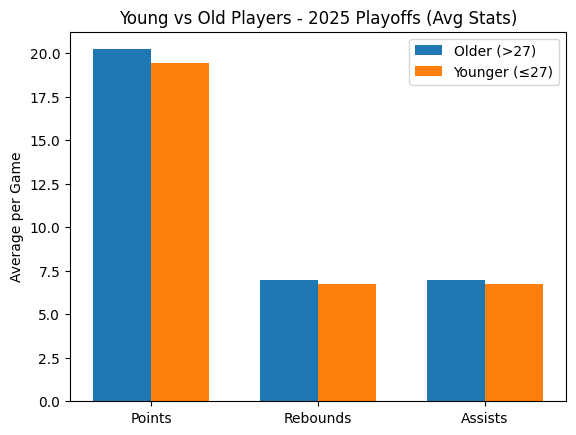

In [24]:
import matplotlib.pyplot as plt

labels = ['Points', 'Rebounds', 'Assists']
old_values = [old['avg_points'][0], old['avg_rebounds'][0], old['avg_assists'][0]]
young_values = [young['avg_points'][0], young['avg_rebounds'][0], young['avg_assists'][0]]

x = range(len(labels))
width = 0.35

# Plotting
plt.bar([pos - width/2 for pos in x], old_values, width, label='Older (>27)')
plt.bar([pos + width/2 for pos in x], young_values, width, label='Younger (≤27)')

plt.xticks(x, labels)
plt.ylabel("Average per Game")
plt.title("Young vs Old Players - 2025 Playoffs (Avg Stats)")
plt.legend()
plt.show()

# **NBA Statistics – SQL & Python Project**
# Overview

This project demonstrates the use of SQL and Python to organize, query, and analyze NBA data. It began with the Denver Nuggets’ 2025 starting five and has expanded to include multiple Western Conference playoff teams. The project highlights how to structure basketball data into relational tables and extract insights using SQL queries and Python visualizations.

# Skills Demonstrated

Database Design: Created multiple tables (PLAYERS and STATS) to store player and performance data.

SQL Queries: Performed selections, filtering, joins, and aggregations (e.g., win percentages, averages by age group).

Data Analysis in Python: Used pandas to query from SQL, clean/manipulate results, and calculate derived statistics.

Visualization: Created charts with matplotlib to compare performance across age groups and teams.

Documentation & Presentation: Clear README and reproducible notebook to showcase workflow.

# Tables

PLAYERS – Player ID, name, team, position, age.

STATS – Wins, losses, points, rebounds, assists for the 2025 playoffs.

Sample Queries

List all players with their positions and ages.

Join PLAYERS and STATS to calculate win percentages.

Compare average points, rebounds, and assists between younger (≤27) and older (>27) players.

Filter by team to analyze “Big 3” playoff performances.

# Insights

Nuggets starting five serve as a baseline example for table design and queries.

Expanded data provides comparisons across multiple Western Conference playoff teams.

Highlights the use of SQL joins and Python visualizations to reveal trends (e.g., age-based performance differences).

How to Run

Open in Google Colab.

Execute the SQL table creation and data insertion cells.

Run provided queries using pandas to view results.

(Optional) Generate visualizations with matplotlib.

# Future Work

Add Eastern Conference playoff teams for a league-wide view.

Incorporate advanced stats (e.g., shooting efficiency, PER, on/off splits).

Build dashboards for interactive data exploration.